In [32]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
import os


sys.path.append(os.path.abspath("../src"))

from utils.config import MID_X, MID_Y, SCREEN_HEIGHT, SCREEN_WIDTH

def determine_position(pos_x, pos_y):
    """Détermine la position du regard en pixels."""
    if pos_x < MID_X and pos_y < MID_Y:
        return "Top Left"
    elif pos_x > MID_X and pos_y < MID_Y:
        return "Top Right"
    elif pos_x < MID_X and pos_y > MID_Y:
        return "Bottom Left"
    elif pos_x > MID_X and pos_y > MID_Y:
        return "Bottom Right"
    else:
        return "Center"


def plot_experiments_bee(file):
    plt.xlim(0,SCREEN_WIDTH)
    plt.ylim(0,SCREEN_HEIGHT)
    
    with open(f"../src/experiments/{file}", "rb") as fd:
        l_pos = pickle.load(fd)
        
    l_pos = np.array(l_pos)

    quandrant_colors = { "Top Left": "blue", 
                        "Top Right" : "red",  
                        "Bottom Left" : "green", 
                        "Bottom Right" : "yellow", 
                        "Center" : "black"}
    
    quadrant_labels = [determine_position(x,y) for x,y in l_pos]
    colors = [quandrant_colors[label] for label in quadrant_labels]
    
    plt.scatter(l_pos[:,0],l_pos[:,1], edgecolors='k',c=colors, alpha=0.75)
    plt.scatter(MID_X,MID_Y,color=['black'],marker='8',s=80,edgecolors="black")
    
    plt.axvline(x=MID_X, color='black', linestyle='--', linewidth=1)
    plt.axhline(y=MID_Y, color='black', linestyle='--', linewidth=1)
    
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=quandrant_colors[q])
                          for q in quandrant_colors.keys()]
    plt.legend(handles,quandrant_colors.keys(),loc='center left', bbox_to_anchor=(1, 0.5))

    plt.gca().invert_yaxis()

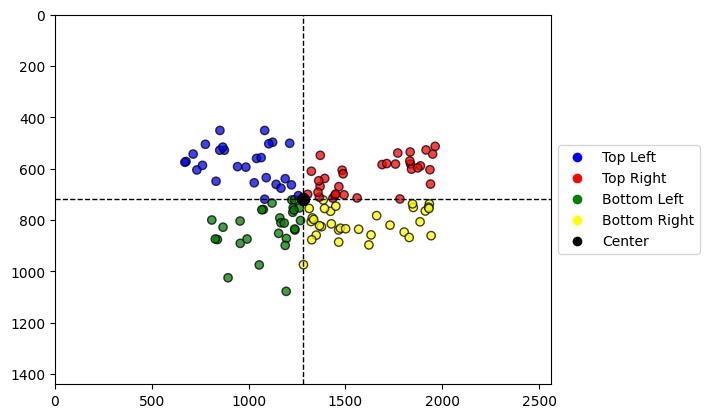

In [36]:
plot_experiments_bee("gaze_2025-02-19_06-11-22.pkl")